###**Student Performance Prediction using ANN**

Aim:-

To predict whether the student has passed(1) or failed(0) based on the following parameters:-

a.  Study Hours

b.  Attendance Percentage

c.  Previous Exam Score

Output:-

Pass(1) / Fail(0)


### **Steps used in this Algorithm:-**

1.  Import Required Libraries

2.  Create Sample Dataset

3.  Perform the  Data Exploration

4.  Data Cleaning and Preprocessing

5.  Divide the dataset into independent and dependent features

6.  Divide the independent and dependent features into training and testing data

7.  Perform the Feature Scaling

8.  Build the ANN Model

9.  Compile the ANN Model

10. Train the ANN Model

11. Make the Prediction for the model

12. Evaluate Model Performance

13. Actual vs Predicted Comparison

14. Predict the output or the sample data whether the student is pass or fail

### Step 1: Import Required Libraries

In [861]:
import numpy              as  np
import pandas             as  pd
import matplotlib.pyplot  as  plt
import seaborn            as  sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers  import Dense

### Step 2: Create Sample Dataset

In [862]:
data = {
    "Study_Hours": [1,2,3,4,5,6,7,8,9,10,11,12],
    "Attendance": [50,55,60,65,70,75,80,85,90,95,96,98],
    "Previous_Score": [30,35,40,45,50,55,60,65,70,80,85,90],
    "Result": [0,0,0,0,0,1,1,1,1,1,1,1]
}


df = pd.DataFrame(data)
print(df)

    Study_Hours  Attendance  Previous_Score  Result
0             1          50              30       0
1             2          55              35       0
2             3          60              40       0
3             4          65              45       0
4             5          70              50       0
5             6          75              55       1
6             7          80              60       1
7             8          85              65       1
8             9          90              70       1
9            10          95              80       1
10           11          96              85       1
11           12          98              90       1


### OBSERVATIONS:

1. The above dataset contains the details of all the Students like

    (a.)   Study_hours

    (b.)   Attendance

    (c.)   Previous_Score

2. Based on all the input features, we need to predict whether the Student has passed(1) or failed(0).

### Step 3: Perform the  Data Exploration

In [863]:
print("Total records in the dataset is:", len(df))

Total records in the dataset is: 12


In [864]:
### shape of the dataset

df.shape

(12, 4)

In [865]:
### get the first five records in the dataset

df.head()

,Study_Hours,Attendance,Previous_Score,Result
0,1,50,30,0
1,2,55,35,0
2,3,60,40,0
3,4,65,45,0
4,5,70,50,0


In [866]:
### get the last five records in the dataset

df.tail()

,Study_Hours,Attendance,Previous_Score,Result
7,8,85,65,1
8,9,90,70,1
9,10,95,80,1
10,11,96,85,1
11,12,98,90,1


In [867]:
### get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Study_Hours     12 non-null     int64
 1   Attendance      12 non-null     int64
 2   Previous_Score  12 non-null     int64
 3   Result          12 non-null     int64
dtypes: int64(4)
memory usage: 516.0 bytes


In [868]:
### get the columns used in the dataset

df.columns

Index(['Study_Hours', 'Attendance', 'Previous_Score', 'Result'], dtype='object')

In [869]:
### get the descriptive summary statistics used in the dataset

df.describe()

,Study_Hours,Attendance,Previous_Score,Result
count,12.000000,12.000000,12.000000,12.000000
mean,6.500000,76.583333,58.750000,0.583333
std,3.605551,16.692177,19.785785,0.514929
min,1.000000,50.000000,30.000000,0.000000
25%,3.750000,63.750000,43.750000,0.000000
50%,6.500000,77.500000,57.500000,1.000000
75%,9.250000,91.250000,72.500000,1.000000
max,12.000000,98.000000,90.000000,1.000000


### OBSERVATIONS:

1. THE above dataset depicts about the statistical summary for numerical column used in the dataset

### Step 4: Data Cleaning and Preprocessing

In [870]:
### Check for any NULL Values in the dataset

df.isnull().sum()

,0
Study_Hours,0
Attendance,0
Previous_Score,0
Result,0


### OBSERVATIONS:

1.  There are no NULL Values in the dataset.

In [871]:
### Check for any duplicate records in the dataset

df[df.duplicated()]

,Study_Hours,Attendance,Previous_Score,Result


### OBSERVATIONS:

1.  There are no duplicate records used in the dataset.

### Step 5: Divide the dataset into independent and dependent features

In [872]:
X = df.drop(columns='Result', axis=1)    ### independent features

Y = df['Result']                         ### dependent features

In [873]:
X

,Study_Hours,Attendance,Previous_Score
0,1,50,30
1,2,55,35
2,3,60,40
3,4,65,45
4,5,70,50
5,6,75,55
6,7,80,60
7,8,85,65
8,9,90,70
9,10,95,80


In [874]:
Y

,Result
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,1


### Step 6.  Divide the independent and dependent features into training and testing data

In [875]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [876]:
X_train

,Study_Hours,Attendance,Previous_Score
8,9,90,70
5,6,75,55
2,3,60,40
1,2,55,35
11,12,98,90
4,5,70,50
7,8,85,65
3,4,65,45
6,7,80,60


In [877]:
X_test

,Study_Hours,Attendance,Previous_Score
10,11,96,85
9,10,95,80
0,1,50,30


In [878]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing data is:", X_test.shape)

Shape of the input training data is: (9, 3)
Shape of the input testing data is: (3, 3)


In [879]:
Y_train

,Result
8,1
5,1
2,0
1,0
11,1
4,0
7,1
3,0
6,1


In [880]:
Y_test

,Result
10,1
9,1
0,0


In [881]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing data is:", Y_test.shape)

Shape of the output training data is: (9,)
Shape of the output testing data is: (3,)


### Step 7: Perform the Feature Scaling


In [882]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

### perform the feature scaling on the inputs to make them in one range

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled = sc.transform(X_test)

In [883]:
X_train_scaled

array([[ 0.93429387,  1.09049951,  0.83405766],
       [-0.07474351, -0.02478408, -0.10425721],
       [-1.08378088, -1.14006767, -1.04257207],
       [-1.42012668, -1.51182887, -1.35534369],
       [ 1.94333124,  1.68531743,  2.08514414],
       [-0.4110893 , -0.39654528, -0.41702883],
       [ 0.59794807,  0.71873832,  0.52128604],
       [-0.74743509, -0.76830648, -0.72980045],
       [ 0.26160228,  0.34697712,  0.20851441]])

In [884]:
X_test_scaled

array([[ 1.60698545,  1.53661295,  1.77237252],
       [ 1.27063966,  1.46226071,  1.4596009 ],
       [-1.75647247, -1.88359007, -1.66811531]])

### Step 8: Build the ANN Model

In [885]:
### Create an object for ANN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    ### Create the first dense layer network
    Dense(16, activation='relu',input_shape=(3,))        ,
    ### Add a dropout unction at every dense layer to reduce the number of unwanted neurons to reduce overitting
    Dropout(0.5)                                         ,
    ### Create the second dense layer network
    Dense(8, activation = 'relu')                        ,
    ### Again add  dropout unction at every dense layer to reduce the number of unwanted neurons to reduce overitting
    Dropout(0.5)                                         ,
    ### Create the output layer
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### OBSERVATIONS:

1. The object for ANN Model is created with the help of the following parameters:-


  (a.)  Dense ---------------> It creates a fully connected dense neural network.

  (b.)  activation = 'relu' ----------> 'Relu' is an activation unction used in the dense neural network to increase the non-linearity of the model.

  (c.) activation = 'sigmoid' --------> 'sigmoid' is an activation function used in the output layer as the target variable contains only binary output 1 or 0.


   

### Step 9:  Compile the ANN Model

In [886]:
model.compile(
    optimizer = 'adam'       ,
    loss      = 'binary_crossentropy' ,
    metrics   = ['accuracy']
)

### OBSERVATIONS:

1. The ann model is made ready for training using the following parameters:-

 (a.)   optimizer = 'adam' -------------> 'adam' is an optimizer that is used to update the weights using backpropagation.

 (b.)   loss = 'binary_crossentropy' -----------> 'binary_crossentropy' is a loss function that is used to solve the binary classification problem.

 (c.)  metrics = ['accuracy'] ------------> It is used to evaluate the performance of the model.

### Step 10: Train the ANN Model

In [887]:
model.fit(
    X_train_scaled      ,
    Y_train             ,
    epochs = 300        ,     ### add more iterations to improve the accuracy
    verbose = 0
)

### OBSERVATIONS:

1.  The model for ANN is trained using the

   (a.)    training data

   (b.)    epochs = 100 ------------> 100 iterations is needed to train the model.

   (c.)   verbose = 0--------------> No information is printed while training the model.

### Step 11: Make the Prediction for the model

In [888]:
Y_pred = model.predict(X_test).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [889]:
Y_pred

array([[1],
       [1],
       [1]])

### Step 12:  Evaluate Model Performance

In [890]:
ac = accuracy_score(Y_test, Y_pred)

print("Accuracy of the model is:", (ac * 100.0))

Accuracy of the model is: 66.66666666666666


In [891]:
cm = confusion_matrix(Y_test, Y_pred)

print(cm)

[[0 1]
 [0 2]]


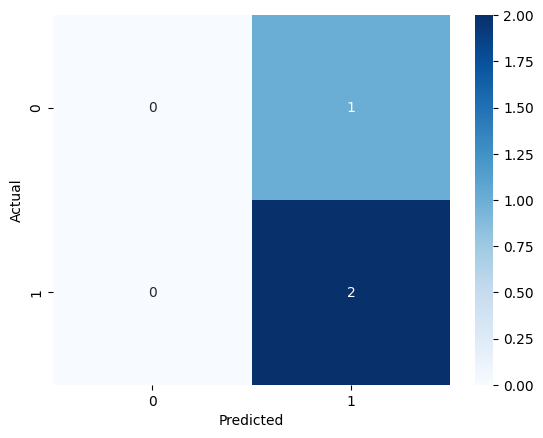

In [892]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [893]:
cr = classification_report(Y_test, Y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Step 13: Actual vs Predicted Comparison

In [894]:
Y_test.values.shape

(3,)

In [895]:
Y_pred.flatten().shape

(3,)

In [896]:
### Combine the Actual and pedicted results in a datarame

df_new = pd.DataFrame({
    "Actual" : Y_test.values           ,
    "Predicted" : Y_pred.flatten()
})

In [897]:
df_new

,Actual,Predicted
0,1,1
1,1,1
2,0,1


### Step 14: Predict the output or the sample data whether the student is pass or fail

In [898]:
### Sample data


new_students = np.array([
    [4, 65, 45],   # Weak student → likely Fail
    [7, 80, 60],   # Borderline → likely Pass
    [10, 90, 75]   # Strong student → Pass
])


### Transform the data

new_transformed_students = sc.transform(new_students)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [899]:
new_transformed_students

array([[-0.74743509, -0.76830648, -0.72980045],
       [ 0.26160228,  0.34697712,  0.20851441],
       [ 1.27063966,  1.09049951,  1.14682928]])

In [900]:
### Predict the output for the sample data using ANN

predictions = model.predict(new_transformed_students)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [901]:
predictions

array([[0.19375467],
       [0.8015607 ],
       [0.97951555]], dtype=float32)

In [902]:
### Predict the class of the outputs

pred_class = (predictions > 0.4).astype(int)

In [903]:
pred_class

array([[0],
       [1],
       [1]])

In [904]:
result_df = pd.DataFrame({
    "Study_Hours": new_students[:, 0],
    "Attendance": new_students[:, 1],
    "Previous_Score": new_students[:, 2],
    "Pass_Probability": predictions.flatten(),
    "Predicted_Result": pred_class.flatten()
})

result_df["Predicted_Result"] = result_df["Predicted_Result"].map({1: "Pass", 0: "Fail"})
result_df


,Study_Hours,Attendance,Previous_Score,Pass_Probability,Predicted_Result
0,4,65,45,0.193755,Fail
1,7,80,60,0.801561,Pass
2,10,90,75,0.979516,Pass
